## **Parsing**


In [49]:
import numpy as np
import struct

# Training images
with open('train-images.idx3-ubyte', 'rb') as i:
    magic, size = struct.unpack('>II', i.read(8))  #reading header
    i.seek(16)  
    data_1 = np.fromfile(i, dtype=np.uint8)  

# Retrieving the dataset 
training_images = data_1.reshape(-1, 784)  # the -1 value reshape the array indicating the unknown numer of rows and 784 columns 
print(training_images.shape) 



(60000, 784)


In [50]:
# Training labels
with open ('train-labels.idx1-ubyte', 'rb') as g:
  magic, size, = struct.unpack('>II', g.read(8))
  g.seek(8)
  data_2 = np.fromfile(g, dtype=np.dtype(np.uint8))

training_labels = data_2.reshape(-1, 1)

print(training_labels.shape)

(60000, 1)


In [51]:
# Test data
with open('t10k-images.idx3-ubyte', 'rb') as h:
    magic, size = struct.unpack('>II', h.read(8))
    h.seek(16)
    data_3 = np.fromfile(h, dtype=np.dtype(np.uint8))

test_images = data_3.reshape(-1, 784)

print(test_images.shape)


(10000, 784)


In [52]:
# Test Labels
with open ('t10k-labels.idx1-ubyte', 'rb') as j:
  magic, size, = struct.unpack('>II', j.read(8))
  j.seek(8)
  data_4 = np.fromfile(j, dtype=np.dtype(np.uint8))

test_labels = data_4.reshape(-1, 1)

print(test_labels.shape)

(10000, 1)


## **Normalization**

In [53]:
print(training_images.min())
print(training_images.max())

0
255


In [54]:
print(training_images[1:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
print(test_images.min())
print(test_images.max())

0
255


In [56]:
# Normalizing training images
training_images = training_images/255



In [57]:
#Normalizing test images
test_images = test_images/255

In [58]:
# Insoection of one vector
print(training_images[0])
print(test_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## **Distances and Similarity computation**

In order to compute the euclidean distance between the values of two vectors I have to apply the previouds formula to each pair of vector i,j

In [59]:
#Library Euclidean distance
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Number of images of training and test
train_images = training_images  # 60,000 training_imges
test_images = test_images  # 10,000 test images

# Define batch size
batch_size = 1000

# Preallocate distance matrix for test images vs train images
distance_matrix = np.zeros((test_images.shape[0], train_images.shape[0]))

# Compute distances batch-wise
for i in range(0, test_images.shape[0], batch_size):  # Loop over test images in batches
    end_i = min(i + batch_size, test_images.shape[0])  # Batch limit for test images
    print(f"Computing distances for test images batch {i}:{end_i}")
    # Compute distances for the current test batch against all train images
    distance_matrix[i:end_i] = euclidean_distances(test_images[i:end_i], train_images)


Computing distances for test images batch 0:1000
Computing distances for test images batch 1000:2000
Computing distances for test images batch 2000:3000
Computing distances for test images batch 3000:4000
Computing distances for test images batch 4000:5000
Computing distances for test images batch 5000:6000
Computing distances for test images batch 6000:7000
Computing distances for test images batch 7000:8000
Computing distances for test images batch 8000:9000
Computing distances for test images batch 9000:10000


In [32]:
print(distance_matrix[:5, :5])

[[ 9.39527723 10.39462864  9.4404245  10.02592027  9.19689866]
 [11.18299431 11.45103747 11.65692261 10.84743098 11.53665505]
 [ 9.22376617 10.07628267  9.15318312  6.55862628  9.00101835]
 [10.03145763  7.76738813 11.85379017 12.15051004 10.62868526]
 [10.59288206 10.9646049   7.72982659  9.96961011  9.69742075]]


In [33]:
# Euclidean distance by my own
# Function to calculate the Euclidean distance between two vectors
def euclidean_distance(v1, v2):
    diff = v1 - v2  # Subtract element by element
    return np.sqrt(np.sum(diff ** 2))  # Square the differences, sum, and take sqrt

# Function to compute the distance matrix between two datasets (test vs training)
def compute_distance_matrix_batches(test_data, train_data, batch_size=1000):
    n_test = len(test_data)  # Number of test vectors
    n_train = len(train_data)  # Number of training vectors
    distance_matrix_2 = np.zeros((n_test, n_train))  # Preallocate the result matrix

    for i in range(0, n_test, batch_size):  # Process test data in batches
        end_i = min(i + batch_size, n_test)  # Ensure batch doesn't exceed bounds
        print(f"Processing batch {i}:{end_i} of test data")
        
        for j in range(n_train):  # Compare each test vector in the batch to all training vectors
            for k in range(i, end_i):  # Iterate over the current batch
                distance_matrix_2[k, j] = euclidean_distance(test_data[k], train_data[j])  # Compute distance
    return distance_matrix_2







In [34]:
#Calling my own functions
# Calculate the distance matrix for all test images against all training images
distance_matrix_euclidean_2 = compute_distance_matrix_batches(test_images, training_images, batch_size=1000)

# checking dimensions
print(distance_matrix_euclidean_2.shape)  # Expected: (10000, 60000)


Processing batch 0:1000 of test data
Processing batch 1000:2000 of test data
Processing batch 2000:3000 of test data
Processing batch 3000:4000 of test data
Processing batch 4000:5000 of test data
Processing batch 5000:6000 of test data
Processing batch 6000:7000 of test data
Processing batch 7000:8000 of test data
Processing batch 8000:9000 of test data
Processing batch 9000:10000 of test data
(10000, 60000)


In [36]:
print(distance_matrix_euclidean_2[:5, :5])

[[ 9.39527723 10.39462864  9.4404245  10.02592027  9.19689866]
 [11.18299431 11.45103747 11.65692261 10.84743098 11.53665505]
 [ 9.22376617 10.07628267  9.15318312  6.55862628  9.00101835]
 [10.03145763  7.76738813 11.85379017 12.15051004 10.62868526]
 [10.59288206 10.9646049   7.72982659  9.96961011  9.69742075]]


COSINE SIMILARITY 

In [38]:
# Cosine similarity with library
# Splitting the test images in batches with size 1000

import numpy as np
from numpy.linalg import norm

# Batch size
batch_size = 1000 #test images per batch

#Training and test images quantity
n_test = test_images.shape[0] #10000
n_train = training_images.shape[0] #60000

# Preallocate the result matrix for cosine similarity
cosine_similarity_matrix = np.zeros((n_test, n_train))

#Process test images in batches
for i in range(0, n_test, batch_size):
    end_i = min(i + batch_size, n_test)  # Ensure batch doesn't exceed bounds
    print(f"Processing batch {i}:{end_i} of test images")

    # Current batch of test images
    test_batch = test_images[i:end_i]

    # Compute norms for test batch and training images
    test_norms = norm(test_batch, axis=1).reshape(-1, 1)  # Norms for test images
    train_norms = norm(training_images, axis=1).reshape(1, -1)  # Norms for training images

    # Compute dot products between test batch and all training images
    dot_products = np.dot(test_batch, training_images.T)

    # Compute cosine similarity for the batch
    cosine_similarity_matrix[i:end_i] = dot_products / (test_norms * train_norms)


Processing batch 0:1000 of test images
Processing batch 1000:2000 of test images
Processing batch 2000:3000 of test images
Processing batch 3000:4000 of test images
Processing batch 4000:5000 of test images
Processing batch 5000:6000 of test images
Processing batch 6000:7000 of test images
Processing batch 7000:8000 of test images
Processing batch 8000:9000 of test images
Processing batch 9000:10000 of test images


In [39]:
print(cosine_similarity_matrix[:5, :5])

[[0.42334021 0.35044986 0.24752037 0.14505682 0.38339982]
 [0.33678871 0.3477641  0.13543288 0.25160656 0.23853338]
 [0.34908289 0.29210832 0.0725565  0.54422919 0.27659917]
 [0.55345092 0.74640531 0.27690166 0.23308376 0.46985732]
 [0.26991794 0.2810965  0.50422782 0.1692757  0.32314815]]


KNN IMPLEMENTATION

In [46]:
#KNN function 
def KNN(matrix, training_labels, k, test_index=None):
    predictions = []  # To store the predicted labels

    if test_index is not None:  # Check if a specific test index is provided
        # Sort distances for the specific test point
        distances_sorted = np.argsort(matrix[test_index])[:k]
        k_nearest_labels = training_labels[distances_sorted]
        predicted_label = np.bincount(k_nearest_labels).argmax()
        return predicted_label  # Return prediction for the specific test point

    # If no test index is provided, predict for all test points
    for i in range(len(matrix)):
        distances_sorted = np.argsort(matrix[i])[:k]
        k_nearest_labels = training_labels[distances_sorted]
        predicted_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(predicted_label)

    return predictions  # Return predictions for all test points

        
    
    

In [71]:
predicted_label = KNN (distance_matrix, training_labels, k=20, test_index=1)
print(f"Predicted label for test point: {predicted_label}")


Predicted label for test point: 2


In [89]:
#Checking the test point with index 1
print(f"True label for test point 1: {test_labels[1]}")


True label for test point 1: 2


In [67]:
!pip install matplotlib
import matplotlib.pyplot as plt

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/42/2a/6d66d0fba41e13e9ca6512a0a51170f43e7e7ed3a8dfa036324100775612/matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/6b/6a/7833cfae2c1e63d1d8875a50fd23371394f540ce809d7383550681a1fa64/contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/89/58/fbcf5dff7e3ea844bb00c4d806ca1e339e1f2dce5529633bf4842c0c9a1f/fonttools-4.55.3-cp312-cp312-m

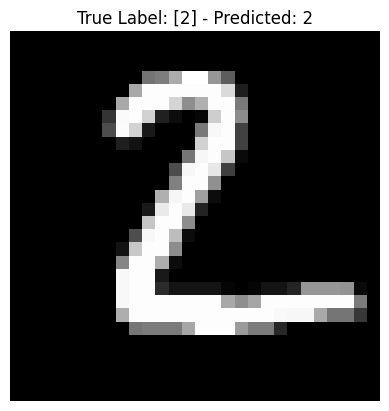

In [74]:
plt.imshow(image_data, cmap='gray')  
plt.title(f"True Label: {test_labels[test_point_index]} - Predicted: {2}")
plt.axis('off') 
plt.show()

Predicting for all datapoints in test data and saving that information

In [80]:
predicted_label = KNN (distance_matrix, training_labels, k=3)


In [88]:
accuracy = np.mean(predicted_label == test_labels) * 100  
print(f"Accuracy: {accuracy}%")

Accuracy: 97.05%
